## 🔍 Wine Quality Data Exploration
This notebook contains exploration and wrangling of the wine quality datasets.

In [1]:
import pandas as pd

There are two datasets, for red and white vinho verde wine samples.

In [2]:
white_wine_ds = pd.read_csv("../dataset/winequality-white.csv", sep=";", quotechar='"')
red_wine_ds = pd.read_csv("../dataset/winequality-red.csv", sep=";", quotechar='"')

print("White wine dataset shape:", white_wine_ds.shape)
print("Red wine dataset shape:", red_wine_ds.shape)

White wine dataset shape: (4898, 12)
Red wine dataset shape: (1599, 12)


In [3]:
print("Samples from white wine dataset:\n")
white_wine_ds.head()

Samples from white wine dataset:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
print("Samples from red wine dataset:\n")
red_wine_ds.head()

Samples from red wine dataset:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Checking for null values in datasets
print("Number of null values in white wine dataset:", white_wine_ds.isna().values.sum())
print("Number of null values in red wine dataset:", red_wine_ds.isna().values.sum())

Number of null values in white wine dataset: 0
Number of null values in red wine dataset: 0


I would add an additonal column 'wine_type' and merge both datasets, using 'wine_type' to determine if the features of both wine types differ. If the features differ significantly, I'll keep the wine_type column, and discard if the features are of similar distribution.

In [6]:
# Merging both datasets
# Creating column wine type in datasets
white_wine_ds["wine_type"] = "white"
red_wine_ds["wine_type"] = "red"

merged_df = pd.concat([white_wine_ds, red_wine_ds], ignore_index=True)
print("Merged dataset shape:", merged_df.shape)

merged_df.head()

Merged dataset shape: (6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

I would compare the feature distributions using side-by-side boxplots of each feature by wine type.

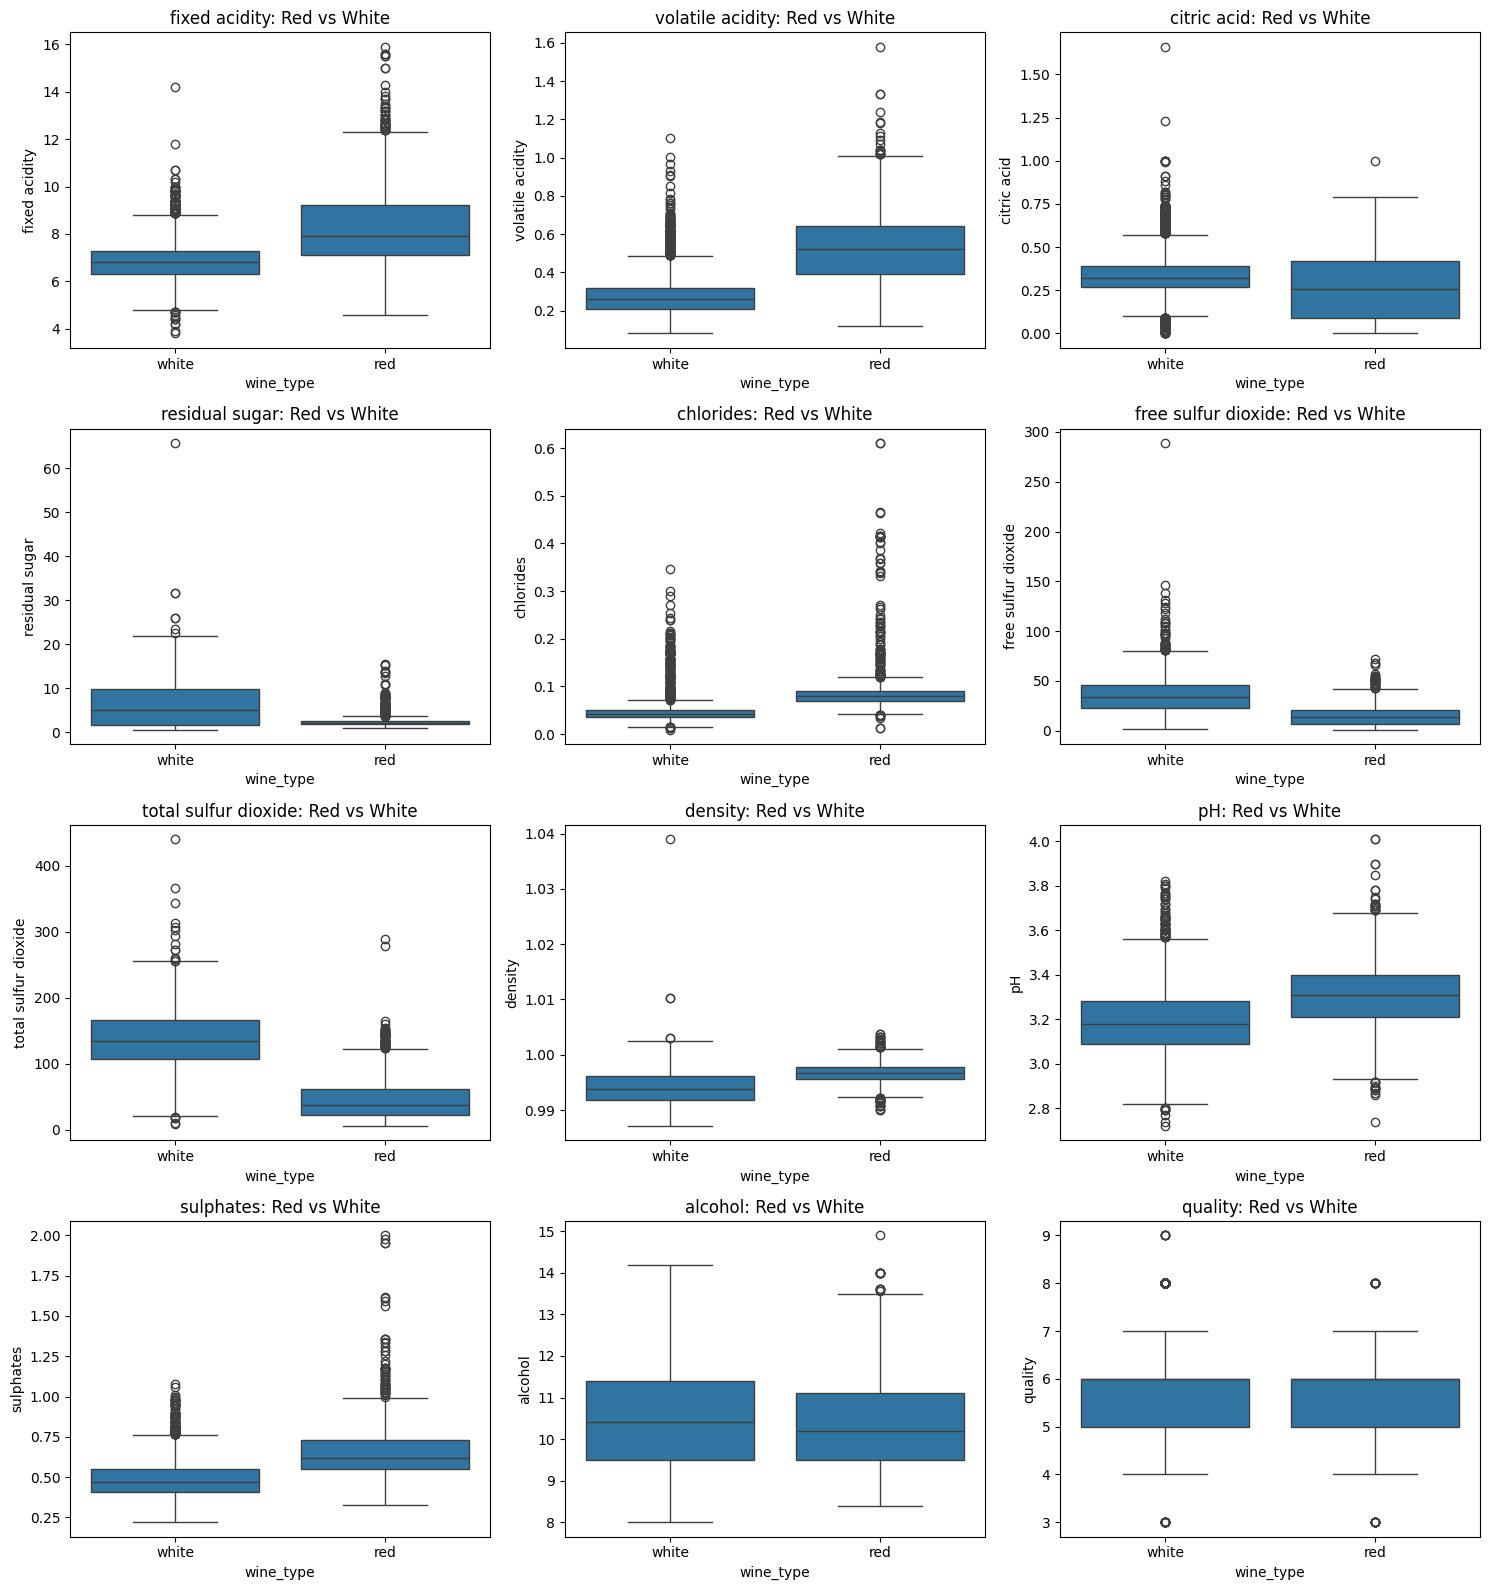

In [8]:
numeric_cols = merged_df.columns.drop(['wine_type'])

n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x='wine_type', y=col, data=merged_df, ax=axes[i])
    axes[i].set_title(f'{col}: Red vs White')

# Hide any unused axes if number of plots is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("../img/red-vs-white-wine-feature-distributions.png")
plt.show()

Most of the features have significantly different distributions, so I'll keep the extra feature 'wine_type' for modelling.

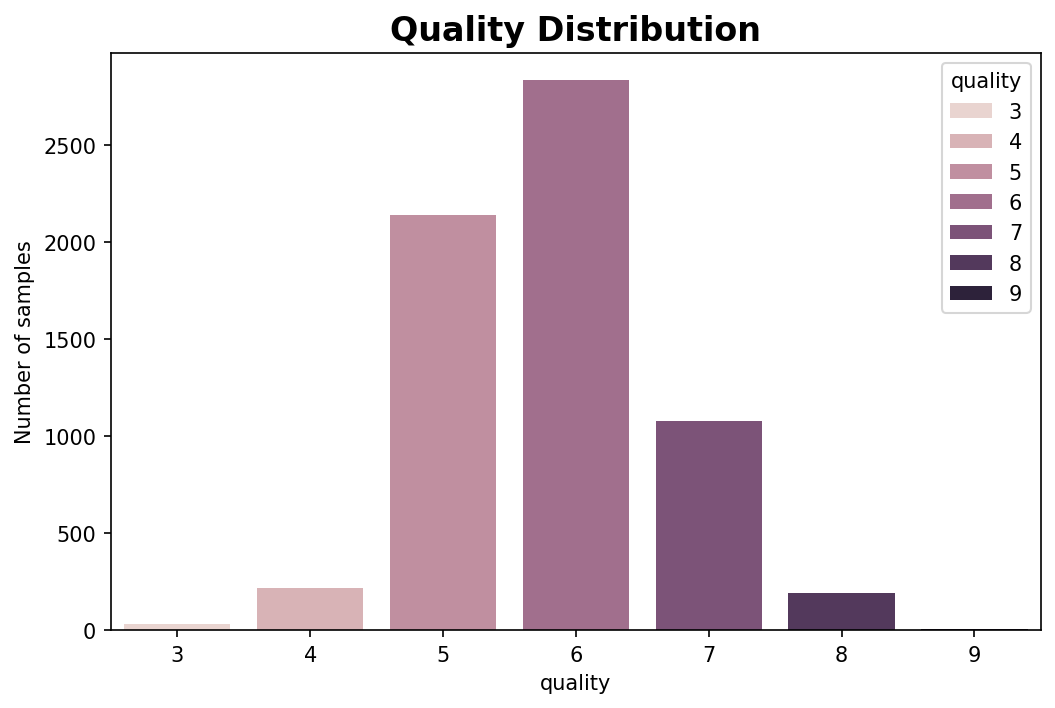

In [9]:
# Distribution of the quality score (dependent variable)
plt.figure(figsize=(8, 5), dpi=150)
sns.countplot(merged_df, x="quality", hue="quality")
plt.ylabel("Number of samples")
plt.title("Quality Distribution", fontsize=16, fontweight="bold")

plt.savefig("../img/quality-distribution.png")
plt.show()

The dataset is imbalanced, especially at the extremes (high and low)

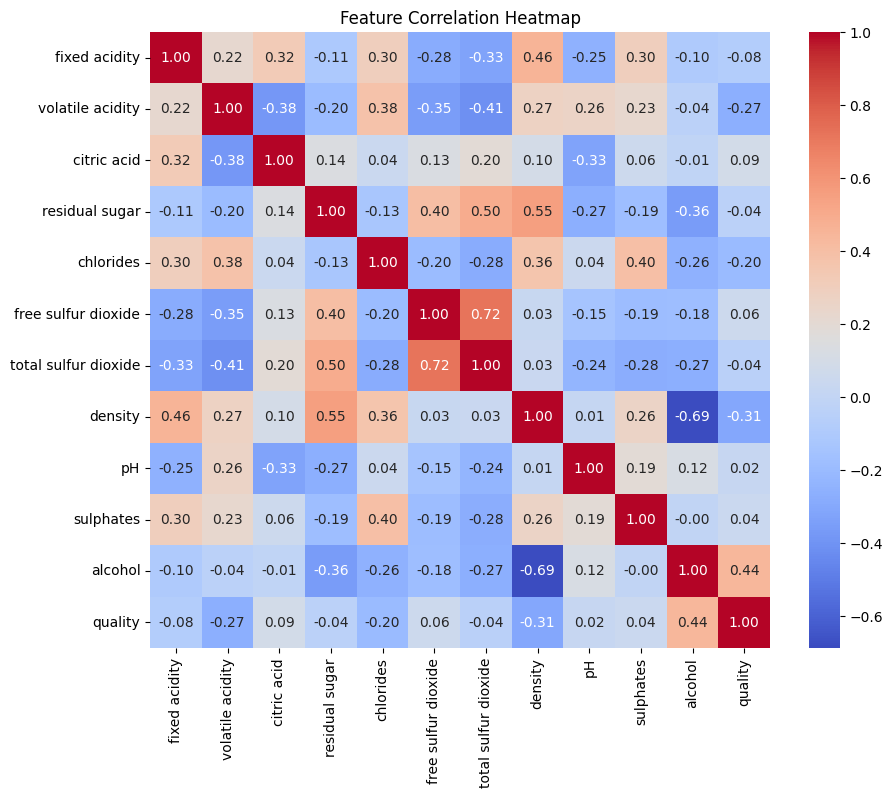

In [10]:
corr = merged_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Feature Correlation Heatmap")
plt.show()

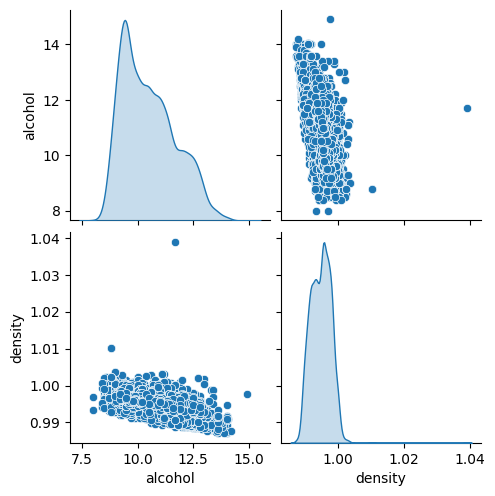

In [11]:
sns.pairplot(merged_df, vars=["alcohol", "density"], diag_kind="kde")
